In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data_mahmoud = pd.read_csv('csv/labeled_data_Mahmoud.csv')
data_josh = pd.read_csv('csv/labeled_data_Josh.csv')
data_zhan = pd.read_csv('csv/labeled_data_Zhan.csv')
data_awen = pd.read_csv('csv/labeled_data_Awen.csv')
data = pd.concat([data_mahmoud, data_josh, data_zhan, data_awen], ignore_index=True)
data.head()

,file_name,character,order,top_left,bottom_right
0,CMC_CCM_2018_01_30_23_14_21_55860660845.png,5,1,"(855.0, 787.0)","(906.0, 820.0)"
1,CMC_CCM_2018_01_30_23_14_21_55860660845.png,5,2,"(855.0, 755.0)","(906.0, 786.0)"
2,CMC_CCM_2018_01_30_23_14_21_55860660845.png,8,3,"(851.0, 720.0)","(907.0, 750.0)"
3,CMC_CCM_2018_01_30_23_14_21_55860660845.png,6,4,"(847.0, 684.0)","(904.0, 717.0)"
4,CMC_CCM_2018_01_30_23_14_21_55860660845.png,0,5,"(845.0, 660.0)","(903.0, 685.0)"


## Data Preparation

In [3]:
# Function to convert coordinate strings to tuples
def convert_coords(coord_str):
    return tuple(map(float, coord_str.strip('()').split(',')))

# Apply this function to the 'top_left' and 'bottom_right' columns
data['top_left'] = data['top_left'].apply(convert_coords)
data['bottom_right'] = data['bottom_right'].apply(convert_coords)

# Calculate width, height, and area of each character
data['width'] = data['bottom_right'].apply(lambda x: x[0]) - data['top_left'].apply(lambda x: x[0])
data['height'] = data['bottom_right'].apply(lambda x: x[1]) - data['top_left'].apply(lambda x: x[1])
data['area'] = data['width'] * data['height']

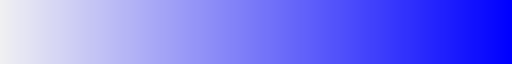

In [16]:
sns.color_palette("light:b", as_cmap=True)

## Character Frequency Analysis

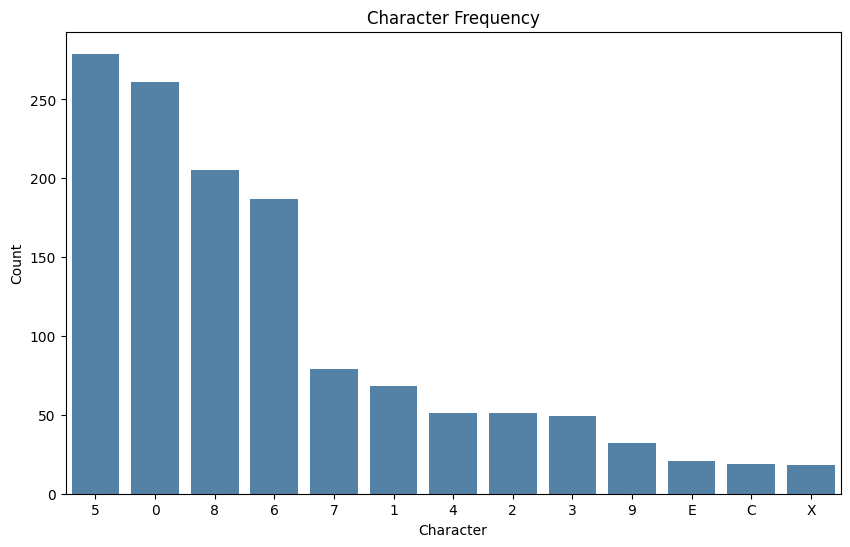

In [22]:
character_counts = data['character'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=character_counts.index, y=character_counts.values,color = 'steelblue')
plt.title('Character Frequency')
plt.xlabel('Character')
plt.ylabel('Count')
plt.savefig('EDA_images/character_frequency.png')
plt.show()

## Character Size Distribution

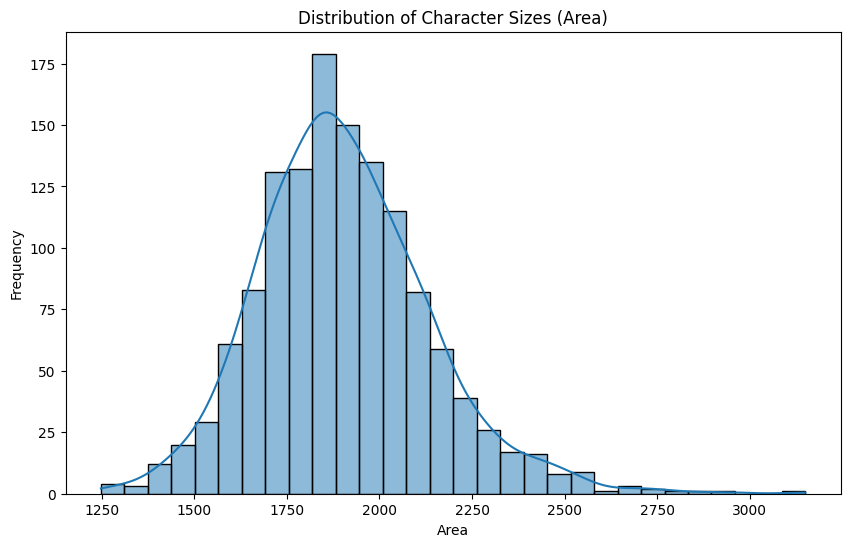

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data['area'], bins=30, kde=True)
plt.title('Distribution of Character Sizes (Area)')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.savefig('EDA_images/size_frequency.png')
plt.show()

## Aspect Ratio Analysis

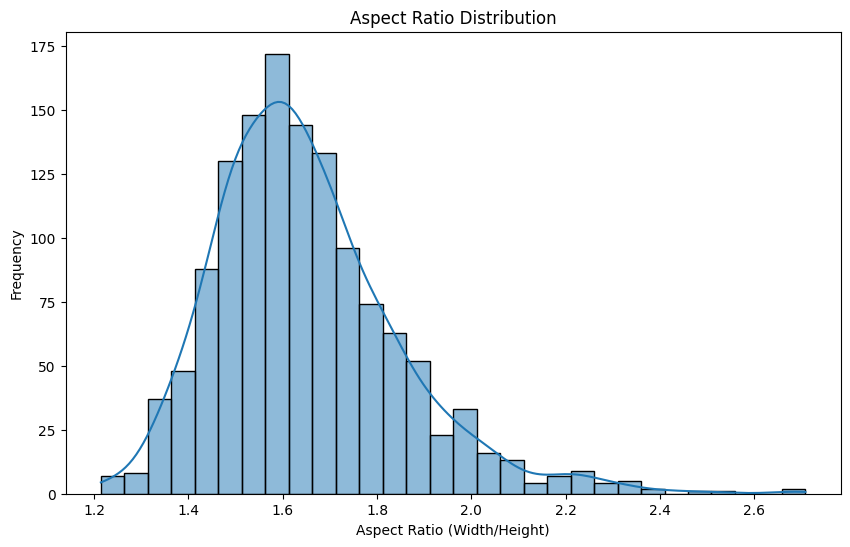

In [8]:
data['aspect_ratio'] = data['width'] / data['height']
plt.figure(figsize=(10, 6))
sns.histplot(data['aspect_ratio'], bins=30, kde=True)
plt.title('Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio (Width/Height)')
plt.ylabel('Frequency')
plt.savefig('EDA_images/aspect_frequency.png')
plt.show()

## Heatmap of Character Locations

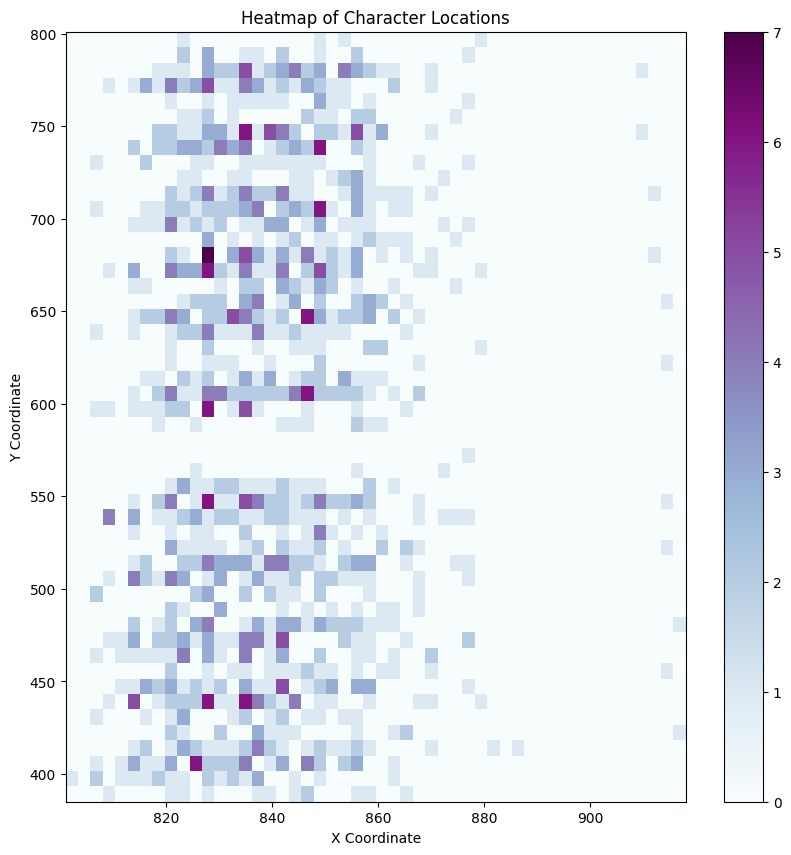

In [10]:
# Assuming the images have a uniform size, you can adjust the bins accordingly
plt.figure(figsize=(10, 10))
plt.hist2d(data['top_left'].apply(lambda x: x[0]), data['top_left'].apply(lambda x: x[1]), bins=[50, 50], cmap="BuPu")
plt.colorbar()
plt.title('Heatmap of Character Locations')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.savefig('EDA_images/location_heatmap.png')
plt.show()

## Character Order Probability

In [11]:
# Create a contingency table
contingency_table = pd.crosstab(data['character'], data['order'])

# Display the first few rows of the table
contingency_table.head()

order,1,2,3,4,5,6,7,8,9,10,11
character,,,,,,,,,,,
0,0,0,0,0,120,0,0,105,13,12,11
1,0,0,0,0,0,0,19,15,14,10,10
2,0,0,0,0,0,0,21,0,13,7,10
3,0,0,0,0,0,0,22,0,7,11,9
4,0,0,0,0,0,0,20,0,12,10,9


In [12]:
# Calculate probabilities
prob_table = contingency_table.div(contingency_table.sum(axis=0), axis=1)

# Display the first few rows of the probabilities table
prob_table.head()

order,1,2,3,4,5,6,7,8,9,10,11
character,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.875,0.108333,0.100000,0.091667
1,0.0,0.0,0.0,0.0,0.0,0.0,0.158333,0.125,0.116667,0.083333,0.083333
2,0.0,0.0,0.0,0.0,0.0,0.0,0.175000,0.000,0.108333,0.058333,0.083333
3,0.0,0.0,0.0,0.0,0.0,0.0,0.183333,0.000,0.058333,0.091667,0.075000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.000,0.100000,0.083333,0.075000


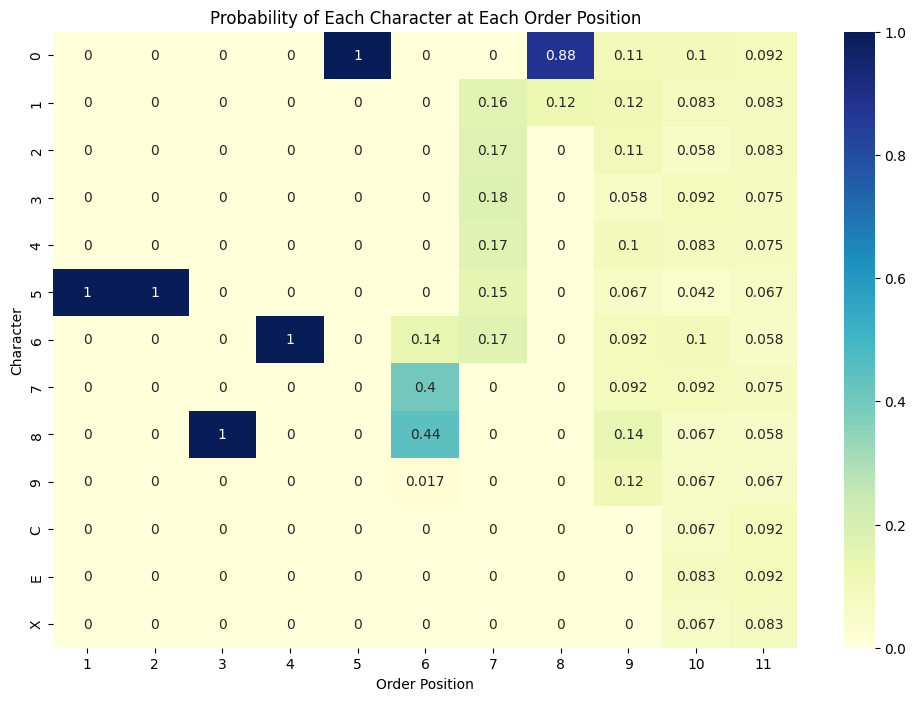

In [13]:
# Plotting the probabilities
plt.figure(figsize=(12, 8))
sns.heatmap(prob_table, annot=True, cmap="YlGnBu")
plt.title('Probability of Each Character at Each Order Position')
plt.xlabel('Order Position')
plt.ylabel('Character')
plt.savefig('EDA_images/order_heatmap.png')
plt.show()